In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

### Lectura de datos

In [2]:
df = pd.read_csv("AnunciosRedesSociales.csv")

In [3]:
X = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=0)

In [5]:
escalaX = StandardScaler()
x_train = escalaX.fit_transform(x_train)
x_test = escalaX.fit_transform(x_test)

### Clasificador

In [6]:
clasificador = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)

In [7]:
clasificador.fit(x_train,y_train)

KNeighborsClassifier()

In [8]:
y_predice = clasificador.predict(x_test)

### Evaluación

In [9]:
cm = confusion_matrix(y_test,y_predice)

In [10]:
cm

array([[64,  4],
       [ 3, 29]])

### Visualización del conjunto de entrenamiento

In [11]:
x_set,y_set= x_train, y_train

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


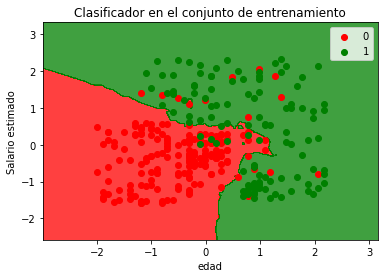

In [12]:
X1,X2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step = 0.01),
                    np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step = 0.01))

plt.contourf(X1,X2,clasificador.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#Graficando los puntos
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c= ListedColormap(('red','green'))(i),label=j)
    
plt.title('Clasificador en el conjunto de entrenamiento')
plt.xlabel('edad')
plt.ylabel('Salario estimado')
plt.legend()
plt.show()

### Visualización del conjunto de testing

In [13]:
x_set,y_set= x_test, y_test

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


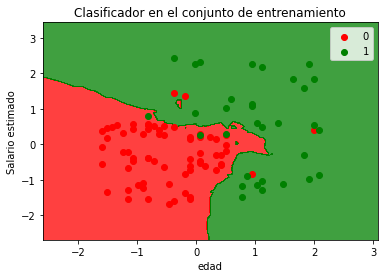

In [14]:
X1,X2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step = 0.01),
                    np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step = 0.01))

plt.contourf(X1,X2,clasificador.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

#Graficando los puntos
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c= ListedColormap(('red','green'))(i),label=j)
    
plt.title('Clasificador en el conjunto de entrenamiento')
plt.xlabel('edad')
plt.ylabel('Salario estimado')
plt.legend()
plt.show()